In [ ]:
import tensorflow as tf

In [ ]:
import keras.utils as ku

In [ ]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [ ]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


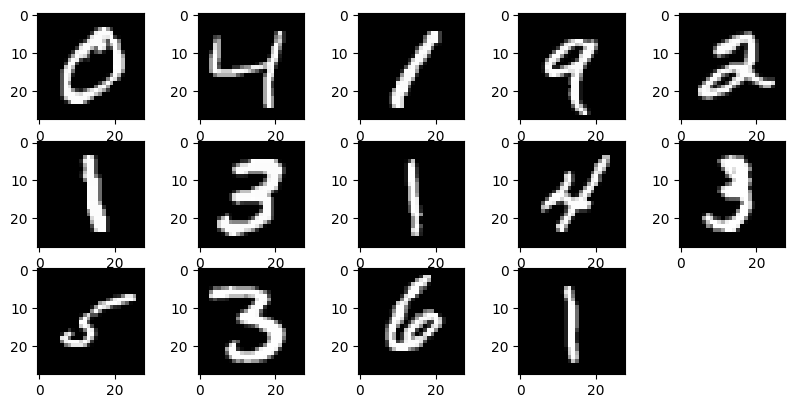

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5015 - loss: 1.7723 - val_accuracy: 0.7702 - val_loss: 0.9851
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7850 - loss: 0.9109 - val_accuracy: 0.8049 - val_loss: 0.7160
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8057 - loss: 0.7002 - val_accuracy: 0.8398 - val_loss: 0.6041
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8437 - loss: 0.5934 - val_accuracy: 0.8559 - val_loss: 0.5337
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8553 - loss: 0.5403 - val_accuracy: 0.8628 - val_loss: 0.5001
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8607 - loss: 0.5012 - val_accuracy: 0.8666 - val_loss: 0.4810
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8688 - loss: 0.4732 - val_accuracy: 0.8704 - val_loss: 0.4701
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8678 - loss: 0.4729 - 

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
layers = tf.keras.layers
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
plt.figure(figsize=(10,8))
for i in range(1, 15):
  plt.subplot(5, 5, i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32,
validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
print('\n\nTest loss', loss)
print('Test accuracy', accuracy)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define a basic neural network with 1 hidden layer
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        # Forward pass
        self.hidden_activation = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output = sigmoid(np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, learning_rate):
        # Backward pass
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_activation.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                loss = mean_squared_error(y, self.output)
                print(f'Epoch {epoch}/{epochs}, Loss: {loss:.4f}')

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)  # Convert to binary predictions (0 or 1)

# Generate a more structured example dataset to achieve higher accuracy
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples, 3 features

# Create a target variable with a clear linear relationship
y = (np.dot(X, np.array([0.3, 0.5, 0.2])) > 0.5).astype(int).reshape(-1, 1)

# Initialize and train the neural network
input_size = 3
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01
model = SimpleNN(input_size, hidden_size, output_size)
model.train(X, y, epochs, learning_rate)

# Test the model
predictions = model.predict(X)
print(f'Final Predictions: {predictions[:5]}')  # Show first 5 predictions

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print(f'Accuracy: {accuracy*100:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

Epoch 0/1000, Loss: 0.4457
Epoch 100/1000, Loss: 0.1560
Epoch 200/1000, Loss: 0.1171
Epoch 300/1000, Loss: 0.0907
Epoch 400/1000, Loss: 0.0733
Epoch 500/1000, Loss: 0.0616
Epoch 600/1000, Loss: 0.0534
Epoch 700/1000, Loss: 0.0474
Epoch 800/1000, Loss: 0.0429
Epoch 900/1000, Loss: 0.0394
Final Predictions: [[1]
 [1]
 [1]
 [1]
 [1]]
Accuracy: 99.0000
Confusion Matrix:
[[50  0]
 [ 1 49]]


In [ ]:
import wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
file=open('/content/exmple.txt')
text=file.read()

In [ ]:
s_w=set(STOPWORDS)

In [ ]:
wc=WordCloud(width=800,
             height=800,
             background_color='black',
             colormap='plasma',
             stopwords=s_w,min_font_size=10).generate(text)

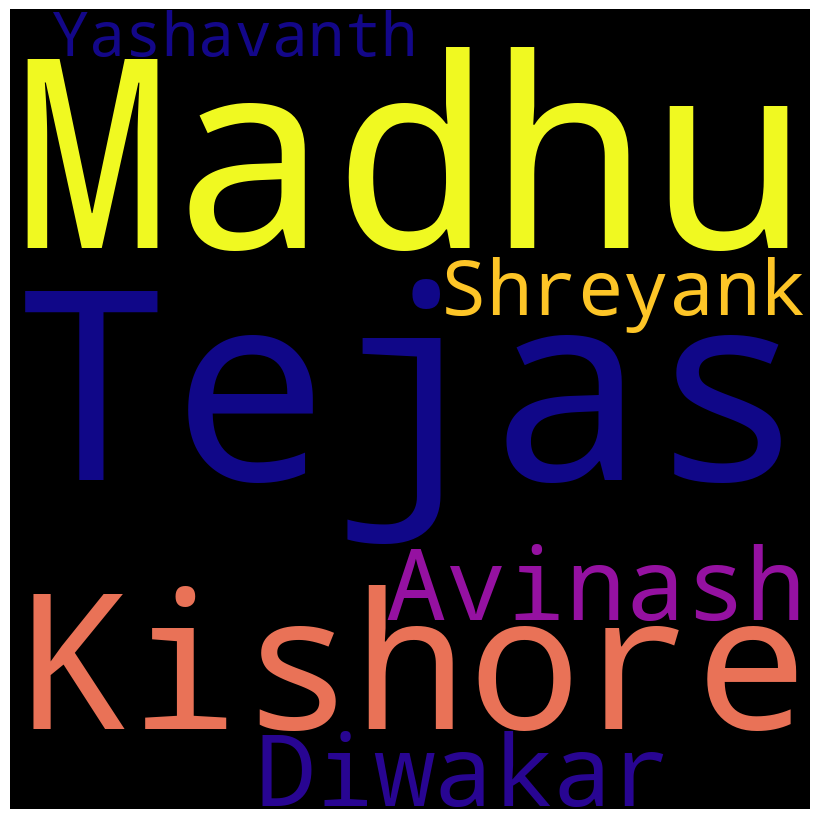

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

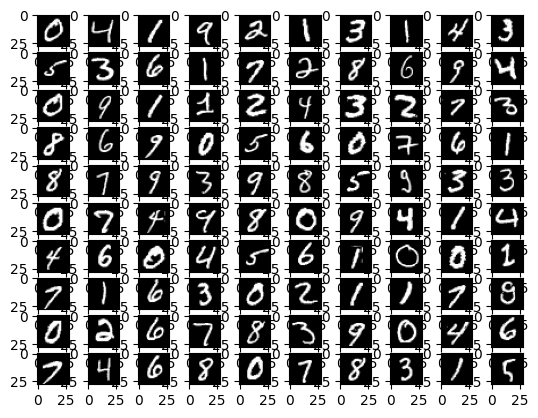

In [ ]:
for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8051 - loss: 4.8937 - val_accuracy: 0.9091 - val_loss: 0.3909
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.2845 - val_accuracy: 0.9364 - val_loss: 0.2428
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9463 - loss: 0.1924 - val_accuracy: 0.9442 - val_loss: 0.2371
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9559 - loss: 0.1602 - val_accuracy: 0.9579 - val_loss: 0.1627
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9582 - loss: 0.1438 - val_accuracy: 0.9545 - val_loss: 0.1675
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9495 - loss: 0.1924
Test accuracy: 0.9545


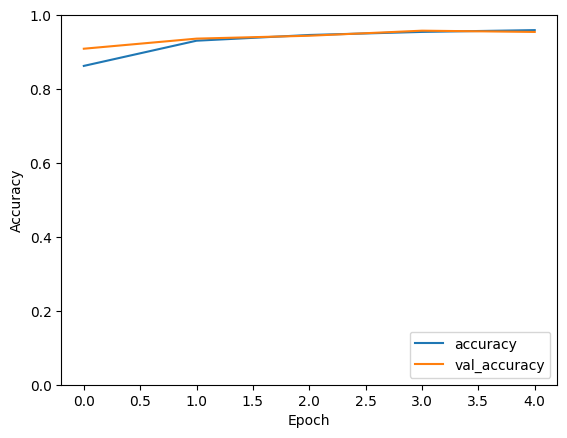

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
# The MNIST dataset contains 70,000 images of handwritten digits (0–9), each 28x28 pixels in grayscale.
# It is split into training data (60,000 samples) and testing data (10,000 samples).
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 2. Preprocess the data: Normalizing the images
# We need to normalize the images by dividing the pixel values by 255.
# This converts the pixel values from the range 0-255 to 0-1, which helps the model to learn better.
train_images = train_images
test_images = test_images

# 3. Build the model
# The model consists of layers that process the input data and make predictions.
model = models.Sequential([
    # Input layer: Flattening the 28x28 image into a 1D vector of 784 pixels
    layers.Flatten(input_shape=(28, 28)),

    # Hidden layer 1: Dense layer with 128 neurons and ReLU activation
    # ReLU (Rectified Linear Unit) is a non-linear activation function that helps the model capture non-linear relationships.
    layers.Dense(128, activation='relu'),

    # Hidden layer 2: Another dense layer to add more learning capacity to the model
    layers.Dense(64, activation='relu'),

    # Output layer: Dense layer with 10 neurons (one for each digit 0-9) and softmax activation
    # Softmax converts the output values into probabilities that sum to 1, which is useful for classification tasks.
    layers.Dense(10, activation='softmax')
])

# 4. Compile the model
# We specify the optimizer (how the model should adjust weights), loss function (how well the model is performing), and metrics (what we want to track).
# 'adam' is an efficient optimization algorithm, 'sparse_categorical_crossentropy' is used because this is a multi-class classification problem.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
# The model is trained on the training data. We specify the number of epochs (complete passes through the training data) and the batch size (how many samples are processed at once).
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

# 6. Evaluate the model
# After training, we evaluate the model's performance on the test data to check how well it generalizes.
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print test accuracy
print(f'Test accuracy: {test_acc:.4f}')

# 7. Visualize accuracy and loss over time
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 2. Preprocess the data
# Normalize the pixel values from 0-255 to 0-1 by dividing by 255
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

# 3. Build the model
# Sequential means the layers are added one after the other.
model = models.Sequential()

# First layer: Flatten the 28x28 images into 1D vectors (784 values)
model.add(layers.Flatten(input_shape=(28, 28)))

# First hidden layer: Dense layer with 128 neurons
# Sigmoid activation function squeezes values into a range between 0 and 1.
# This helps the model to introduce non-linearity, allowing it to learn complex patterns.
model.add(layers.Dense(128, activation='sigmoid'))

# Second hidden layer: Another dense layer with 64 neurons
# The sigmoid activation function helps in modeling non-linear relationships.
model.add(layers.Dense(64, activation='sigmoid'))

# Output layer: Dense layer with 10 neurons (one for each digit)
# We again use sigmoid here for simplicity, but softmax is commonly used for classification.
model.add(layers.Dense(10, activation='sigmoid'))

# 4. Compile the model
# We'll use 'adam' as the optimizer, which adjusts weights during training
# 'sparse_categorical_crossentropy' works well for multi-class classification problems
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
# Train the model on the training data for 5 epochs
# Validation data is the test set, to see how well it performs on unseen data during training
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7887 - loss: 0.8399 - val_accuracy: 0.9378 - val_loss: 0.2171
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9435 - loss: 0.1967 - val_accuracy: 0.9570 - val_loss: 0.1464
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9628 - loss: 0.1294 - val_accuracy: 0.9637 - val_loss: 0.1134
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9734 - loss: 0.0889 - val_accuracy: 0.9716 - val_loss: 0.0956
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9797 - loss: 0.0695 - val_accuracy: 0.9737 - val_loss: 0.0843
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.0960
Test accuracy: 0.9737


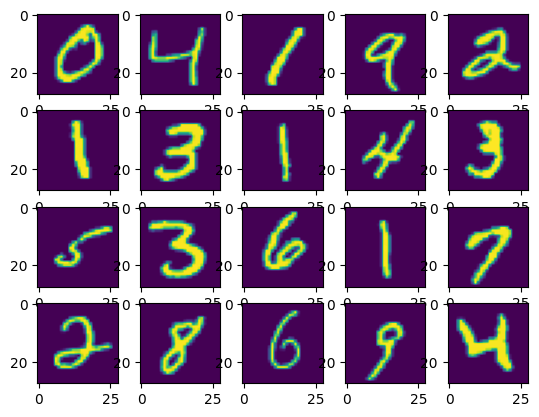

In [ ]:

import matplotlib.pyplot as plt
for i in range(1,21):
  plt.subplot(4,5,i)
  plt.imshow(train_images[i])
plt.show()

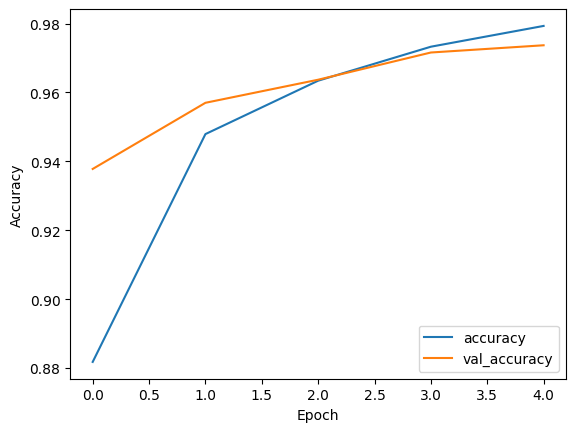

In [ ]:
# 7. Visualize accuracy and loss over time
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


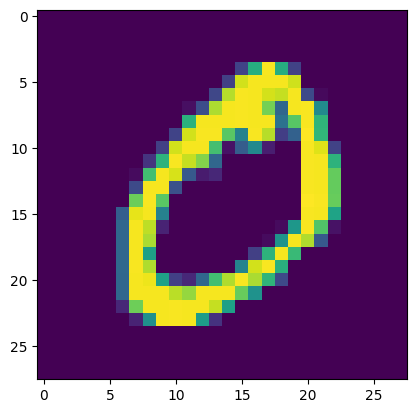

In [ ]:
#plt.subplot(2,5,1)
plt.imshow(train_images[1])


(1, 28, 28)

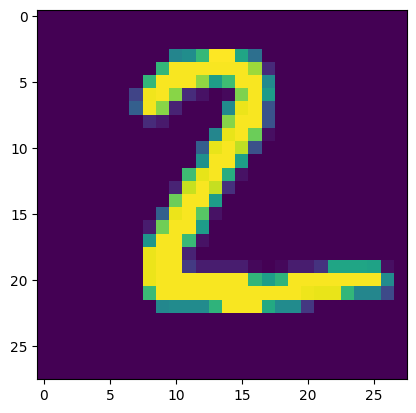

In [ ]:
# Add a batch dimension to the image using np.expand_dims
img=test_images[1]
label_=test_labels[1]
import numpy as np
#showing image before predictions
plt.imshow(img)
reshaped_image=np.expand_dims(img,axis=0)
reshaped_image.shape


In [ ]:
pred=model.predict(reshaped_image)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[4.7862981e-02, 7.2572243e-01, 9.9925947e-01, 4.7775668e-01,
        7.5633088e-03, 1.7044623e-01, 1.6984843e-01, 9.5409928e-03,
        7.0741273e-02, 2.1496415e-04]], dtype=float32)

In [ ]:
pred_digit=np.argmax(pred)
print(f'predicted label of random prediction:{pred_digit},and its actual label is:{label_}')

predicted label of random prediction:2,and its actual label is:2


In [ ]:
#Another Reshaping technique we can use
reshape=np.reshape(img,(1,28,28))

In [ ]:
reshape.shape

(1, 28, 28)

In [ ]:
#So we can see here that the Model Predicted the Random value from the test_images and its label is equal to its value.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted digit: 1


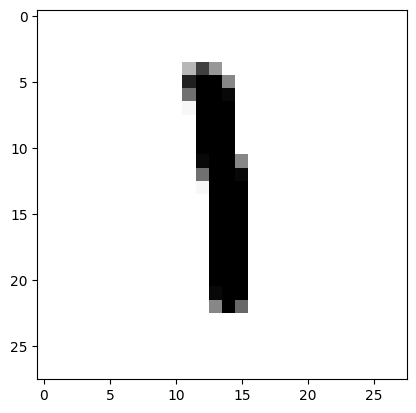

In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Function to load and preprocess a local image
def preprocess_local_image(image_path):
    # Load the image using PIL (in grayscale mode 'L' to match MNIST format)
    img = Image.open(image_path).convert('L')
    plt.imshow(img,cmap=plt.get_cmap('gray')) # 'L' mode is for grayscale


    # Resize the image to 28x28 pixels to match MNIST images
    img = img.resize((28, 28))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Invert the colors (MNIST has white digits on black background)
    img_array = 255 - img_array

    # Normalize the image (scale pixel values to 0-1 range)
    img_array = img_array / 255.0

    # Reshape the image to match the input shape of the model (1, 28, 28)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Path to the local image
image_path = '/content/1.png'  # Change this to your image's file path

# Preprocess the image
processed_image = preprocess_local_image(image_path)

# Use the trained model to predict the digit
predictions = model.predict(processed_image)

# Get the predicted digit
predicted_digit = np.argmax(predictions)

print(f'Predicted digit: {predicted_digit}')


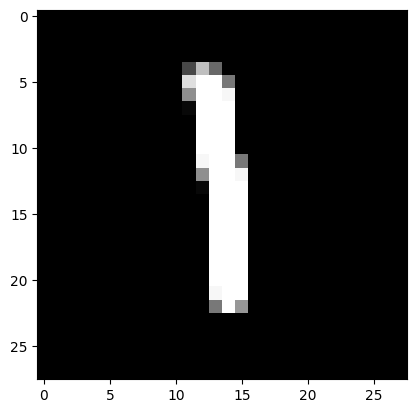

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted digit: 1


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to load and preprocess a local image
def preprocess_local_image(image_path):
    # Load the image using PIL (in grayscale mode 'L' to match MNIST format)
    img = Image.open(image_path).convert('L')  # 'L' mode is for grayscale

    # Resize the image to 28x28 pixels to match MNIST images
    img = img.resize((28, 28))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Invert the colors (if needed, assuming your images are black digits on white background)
    img_array = 255 - img_array

    # Normalize the image (scale pixel values to 0-1 range)
    img_array = img_array / 255.0

    # Reshape the image to match the input shape of the model (1, 28, 28)
    img_array = np.expand_dims(img_array, axis=0)

    # Display the preprocessed image to ensure it's correct
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.show()

    return img_array

# Path to the local image
image_path = '/content/1.png'  # Change this to your image's file path

# Preprocess the image
processed_image = preprocess_local_image(image_path)

# Use the trained model to predict the digit
predictions = model.predict(processed_image)

# Get the predicted digit
predicted_digit = np.argmax(predictions)

print(f'Predicted digit: {predicted_digit}')


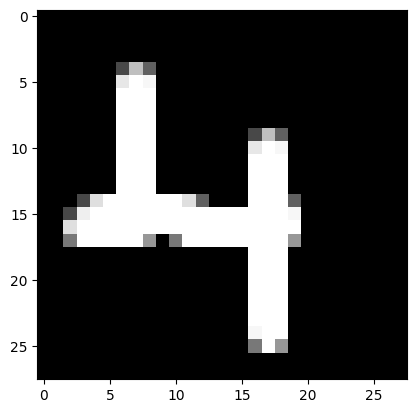

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted digit: 4


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to load and preprocess a local image
def preprocess_local_image(image_path):
    # Load the image using PIL (in grayscale mode 'L' to match MNIST format)
    img = Image.open(image_path).convert('L')  # 'L' mode is for grayscale

    # Resize the image to 28x28 pixels to match MNIST images
    img = img.resize((28, 28))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Invert the colors (if needed, assuming your images are black digits on white background)
    img_array = 255 - img_array

    # Normalize the image (scale pixel values to 0-1 range)
    img_array = img_array / 255.0

    # Reshape the image to match the input shape of the model (1, 28, 28)
    img_array = np.expand_dims(img_array, axis=0)

    # Display the preprocessed image to ensure it's correct
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.show()

    return img_array

# Path to the local image
image_path = '/content/one.png'  # Change this to your image's file path

# Preprocess the image
processed_image = preprocess_local_image(image_path)

# Use the trained model to predict the digit
predictions = model.predict(processed_image)

# Get the predicted digit
predicted_digit = np.argmax(predictions)

print(f'Predicted digit: {predicted_digit}')


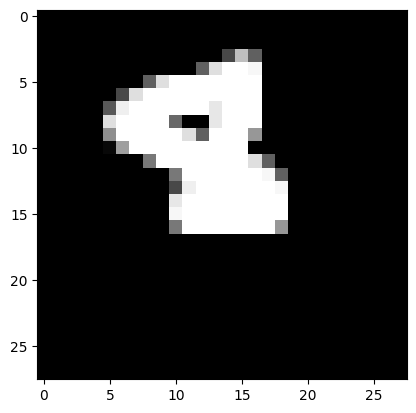

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted digit: 9


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to load and preprocess a local image
def preprocess_local_image(image_path):
    # Load the image using PIL (in grayscale mode 'L' to match MNIST format)
    img = Image.open(image_path).convert('L')  # 'L' mode is for grayscale

    # Resize the image to 28x28 pixels to match MNIST images
    img = img.resize((28, 28))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Invert the colors (if needed, assuming your images are black digits on white background)
    img_array = 255 - img_array

    # Normalize the image (scale pixel values to 0-1 range)
    img_array = img_array / 255.0

    # Reshape the image to match the input shape of the model (1, 28, 28)
    img_array = np.expand_dims(img_array, axis=0)

    # Display the preprocessed image to ensure it's correct
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.show()

    return img_array

# Path to the local image
image_path = '/content/eigth.png'  # Change this to your image's file path

# Preprocess the image
processed_image = preprocess_local_image(image_path)

# Use the trained model to predict the digit
predictions = model.predict(processed_image)

# Get the predicted digit
predicted_digit = np.argmax(predictions)

print(f'Predicted digit: {predicted_digit}')


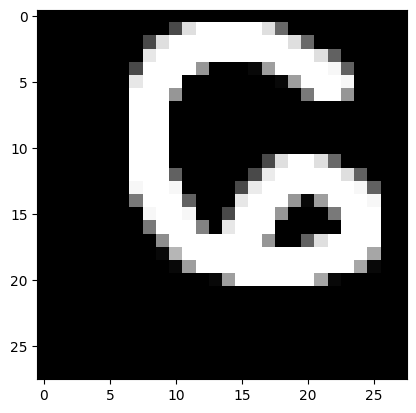

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted digit: 6


In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to load and preprocess a local image
def preprocess_local_image(image_path):
    # Load the image using PIL (in grayscale mode 'L' to match MNIST format)
    img = Image.open(image_path).convert('L')  # 'L' mode is for grayscale

    # Resize the image to 28x28 pixels to match MNIST images
    img = img.resize((28, 28))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Invert the colors (if needed, assuming your images are black digits on white background)
    img_array = 255 - img_array

    # Normalize the image (scale pixel values to 0-1 range)
    img_array = img_array / 255.0

    # Reshape the image to match the input shape of the model (1, 28, 28)
    img_array = np.expand_dims(img_array, axis=0)

    # Display the preprocessed image to ensure it's correct
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.show()

    return img_array

# Path to the local image
image_path = '/content/six.png'  # Change this to your image's file path

# Preprocess the image
processed_image = preprocess_local_image(image_path)

# Use the trained model to predict the digit
predictions = model.predict(processed_image)

# Get the predicted digit
predicted_digit = np.argmax(predictions)

print(f'Predicted digit: {predicted_digit}')
